# Google Mobility Reports: quels impacts sur le comportement des Français face au Covid-19



Ce dataset inclut **3 périodes** importantes pour voir l'effet de la décision prise par le gouvernement français : 
1. Mars - Mai 
2. Mai - Oct
3. Oct -  

A travers une première analyse, je vous présente graphiquement les tendances de chaque secteur pour découvrir des informations intéressantes sur le comportement social et l'évolution de la période de confinement.

# First global analysis 

In [78]:
pip install semopy

     |████████████████████████████████| 143kB 1.3MB/s eta 0:00:01
  Created wheel for semopy: filename=semopy-2.0.9-cp37-none-any.whl size=148765 sha256=1205968fdebbbaec5227ee4f811cce2658edffec3df3f9647f67752e841b5290
  Stored in directory: /Users/jiani/Library/Caches/pip/wheels/14/74/90/44f433bdbcf10a37cc9b4dc4edbb0a93f089aa5d81affe6847
Successfully built semopy
Note: you may need to restart the kernel to use updated packages.


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [48]:
URL="https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv"
df=pd.read_csv(URL, low_memory=False) 
df=pd.read_csv('Global_Mobility_Report.csv', low_memory=False) 

In [49]:
df=df[df.country_region_code== 'FR']
print(df['date'].min())
print(df['date'].max())

2020-02-15
2020-11-06


In [76]:
#df['date'] =  pd.to_datetime(df['date'])
#df.set_index(pd.DatetimeIndex(df['date']), inplace=True)
df.corr()

,Retail_and_Recreation,Grocery_and_Pharmacy,Parks,Transit_Stations,Workplaces,Residences
Retail_and_Recreation,1.000000,0.902489,0.746049,0.822624,0.655428,-0.809419
Grocery_and_Pharmacy,0.902489,1.000000,0.701121,0.735633,0.604901,-0.691936
Parks,0.746049,0.701121,1.000000,0.633665,0.302553,-0.483802
Transit_Stations,0.822624,0.735633,0.633665,1.000000,0.651430,-0.752838
Workplaces,0.655428,0.604901,0.302553,0.651430,1.000000,-0.882421
Residences,-0.809419,-0.691936,-0.483802,-0.752838,-0.882421,1.000000


In [51]:
df.shape

(29249, 14)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29249 entries, 2020-02-15 to 2020-11-06
Data columns (total 14 columns):
country_region_code                                   29249 non-null object
country_region                                        29249 non-null object
sub_region_1                                          28983 non-null object
sub_region_2                                          25525 non-null object
metro_area                                            0 non-null object
iso_3166_2_code                                       28983 non-null object
census_fips_code                                      0 non-null float64
date                                                  29249 non-null datetime64[ns]
retail_and_recreation_percent_change_from_baseline    28760 non-null float64
grocery_and_pharmacy_percent_change_from_baseline     28727 non-null float64
parks_percent_change_from_baseline                    27351 non-null float64
transit_stations_percent_change_fr

In [53]:
df.isnull().sum()

country_region_code                                       0
country_region                                            0
sub_region_1                                            266
sub_region_2                                           3724
metro_area                                            29249
iso_3166_2_code                                         266
census_fips_code                                      29249
date                                                      0
retail_and_recreation_percent_change_from_baseline      489
grocery_and_pharmacy_percent_change_from_baseline       522
parks_percent_change_from_baseline                     1898
transit_stations_percent_change_from_baseline          1656
workplaces_percent_change_from_baseline                 112
residential_percent_change_from_baseline                254
dtype: int64

In [54]:
df.drop('sub_region_2',1,inplace=True)

In [55]:
df.drop('metro_area',1,inplace=True)

In [56]:
df.drop('census_fips_code',1,inplace=True)

In [57]:
df.rename(columns={'sub_region_1': 'Province',
                   'retail_and_recreation_percent_change_from_baseline': 'Retail_and_Recreation', 
                   'grocery_and_pharmacy_percent_change_from_baseline':'Grocery_and_Pharmacy', 
                   'parks_percent_change_from_baseline':'Parks',
                   'transit_stations_percent_change_from_baseline': 'Transit_Stations',
                   'workplaces_percent_change_from_baseline':'Workplaces',
                   'residential_percent_change_from_baseline': 'Residences',
                   'date':'Date'},inplace=True)

In [58]:
df.shape

(29249, 11)

In [59]:
df=df[['Date',
 'Province',
 'Retail_and_Recreation',
 'Grocery_and_Pharmacy',
 'Parks',
 'Transit_Stations',
 'Workplaces',
 'Residences']]

In [60]:
df.head()

,Date,Province,Retail_and_Recreation,Grocery_and_Pharmacy,Parks,Transit_Stations,Workplaces,Residences
date,,,,,,,,
2020-02-15,2020-02-15,NaN,-2.0,-1.0,23.0,12.0,-2.0,-1.0
2020-02-16,2020-02-16,NaN,6.0,2.0,9.0,7.0,-1.0,-1.0
2020-02-17,2020-02-17,NaN,1.0,2.0,16.0,-6.0,-15.0,4.0
2020-02-18,2020-02-18,NaN,5.0,2.0,36.0,-4.0,-14.0,3.0
2020-02-19,2020-02-19,NaN,-4.0,-3.0,18.0,-6.0,-12.0,2.0


In [61]:
df.Province=df.Province.replace(np.nan, 'France (General)')

In [63]:
null_columns = df.columns[df.isnull().any()]
print(df[df['Province'].isnull()][null_columns])

Empty DataFrame
Columns: [Retail_and_Recreation, Grocery_and_Pharmacy, Parks, Transit_Stations, Workplaces, Residences]
Index: []


In [ ]:
df.to_csv('google_clean.csv', sep='\t')

In [ ]:
df['Grocery_and_Pharmacy'].plot(figsize=(15,6))
plt.legend()
plt.axhline(linewidth=4, color='#d62728')
plt.axvline(pd.Timestamp('2020-03-17'), color='black')
plt.axvline(pd.Timestamp('2020-05-25'), color='blue')
plt.axvline(pd.Timestamp('2020-11-01'), color='green')

In [ ]:
#df['Retail_and_Recreation'].plot(figsize=(15,6), hue = 'Province')
region = sns.lineplot(x="Date", y="Retail_and_Recreation", hue='Province', data=df)
plt.legend()
plt.axhline(linewidth=4, color='#d62728')
plt.axvline(pd.Timestamp('2020-03-17'), color='black')
plt.axvline(pd.Timestamp('2020-05-25'), color='blue')
plt.axvline(pd.Timestamp('2020-11-01'), color='green')

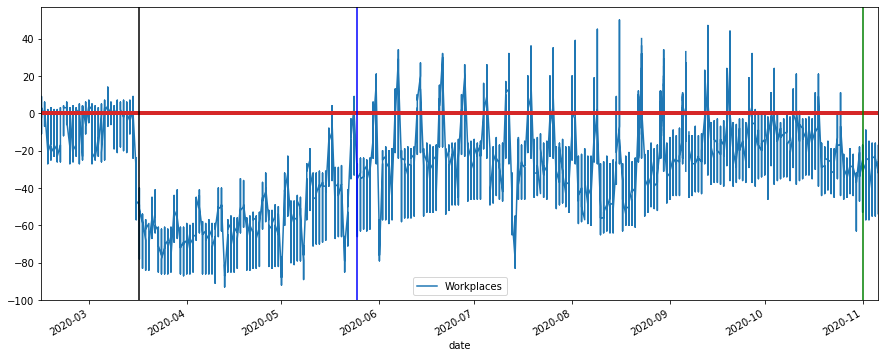

In [125]:
df['Workplaces'].plot(figsize=(15,6))
plt.legend()
plt.axhline(linewidth=4, color='#d62728')
plt.axvline(pd.Timestamp('2020-03-17'), color='black')
plt.axvline(pd.Timestamp('2020-05-25'), color='blue')
plt.axvline(pd.Timestamp('2020-11-01'), color='green')

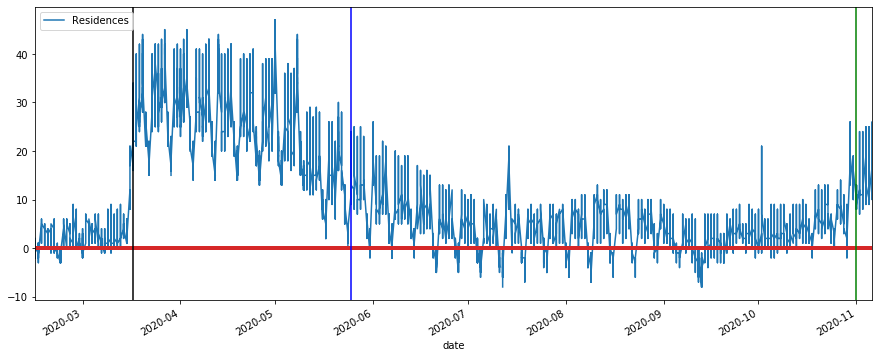

In [126]:
df['Residences'].plot(figsize=(15,6))
plt.legend()
plt.axhline(linewidth=4, color='#d62728')
plt.axvline(pd.Timestamp('2020-03-17'), color='black')
plt.axvline(pd.Timestamp('2020-05-25'), color='blue')
plt.axvline(pd.Timestamp('2020-11-01'), color='green')

In [67]:
df_melt = pd.melt(df, id_vars=['Province','Date'], value_vars=['Retail_and_Recreation',
 'Grocery_and_Pharmacy',
 'Parks',
 'Transit_Stations',
 'Workplaces',
 'Residences'])
df_melt

,Province,Date,variable,value
0,France (General),2020-02-15,Retail_and_Recreation,-2.0
1,France (General),2020-02-16,Retail_and_Recreation,6.0
2,France (General),2020-02-17,Retail_and_Recreation,1.0
3,France (General),2020-02-18,Retail_and_Recreation,5.0
4,France (General),2020-02-19,Retail_and_Recreation,-4.0
...,...,...,...,...
175489,Provence-Alpes-Côte d'Azur,2020-11-02,Residences,12.0
175490,Provence-Alpes-Côte d'Azur,2020-11-03,Residences,12.0
175491,Provence-Alpes-Côte d'Azur,2020-11-04,Residences,13.0
175492,Provence-Alpes-Côte d'Azur,2020-11-05,Residences,13.0


In [73]:
df_work = df_melt[df_melt['variable'] == 'Workplaces']
df_work

,Province,Date,variable,value
116996,France (General),2020-02-15,Workplaces,-2.0
116997,France (General),2020-02-16,Workplaces,-1.0
116998,France (General),2020-02-17,Workplaces,-15.0
116999,France (General),2020-02-18,Workplaces,-14.0
117000,France (General),2020-02-19,Workplaces,-12.0
...,...,...,...,...
146240,Provence-Alpes-Côte d'Azur,2020-11-02,Workplaces,-23.0
146241,Provence-Alpes-Côte d'Azur,2020-11-03,Workplaces,-26.0
146242,Provence-Alpes-Côte d'Azur,2020-11-04,Workplaces,-25.0
146243,Provence-Alpes-Côte d'Azur,2020-11-05,Workplaces,-26.0


Text(0, 0.5, 'Change from baseline')

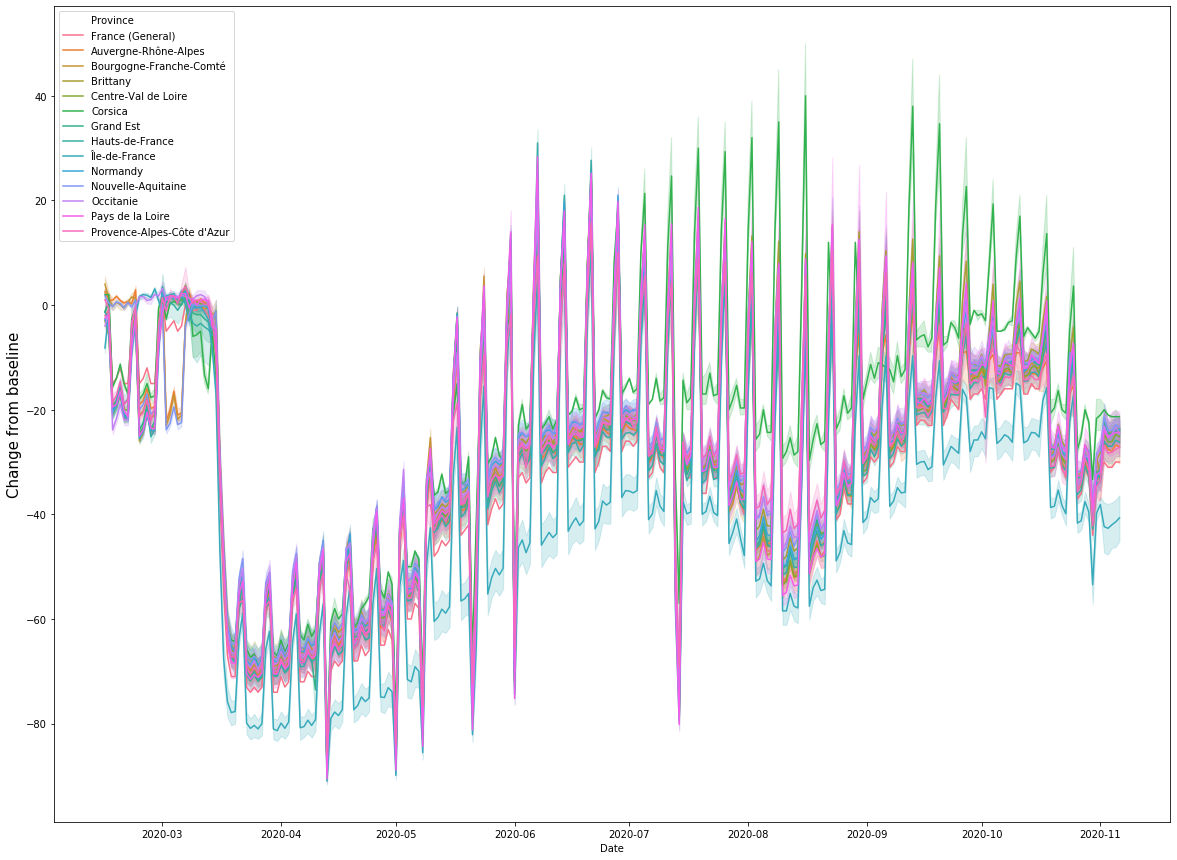

In [74]:
plt.figure(figsize=(20,15))
W=sns.lineplot(x="Date", y="value", hue='Province', data=df_work)
W.set_ylabel("Change from baseline",fontsize=15)